In [10]:
# the beginning of matricies workings
import random 
import numpy as np
import matplotlib.pyplot as plt
import time
import geopandas as gpd
import pandas as pd
import os


In [11]:


# creation of a matrix that will be used to make random numbers 
# matrix = np.random.rand(3,3)
# print(matrix)

test = np.array([[1,2,3],[4,6,7],[8,9,10]])
print(test)
print(test[0,2] + test[1,2]+ test[2,2])
print("just print out the first array", test[0])

[[ 1  2  3]
 [ 4  6  7]
 [ 8  9 10]]
20
just print out the first array [1 2 3]


In [14]:
#random array integers 
for i in range(5):
    #random_array = np.random.sample(0,65, size=(4,5)) 
    random_array = np.random.permutation(65)[:10]
    print(random_array)


[22 46 58 34 48 39  6  7 54 18]
[39 55 60 31 21  3 33  2 35 34]
[32  4 60 14 34 56 10 55 21 30]
[45 31  9  5 51 43 52 56  7 32]
[11  0 54 42 17 26  6 34 47 21]


In [15]:
# Return a randomized "range" using a Linear Congruential Generator
# to produce the number sequence. Parameters are the same as for 
# python builtin "range".
#   Memory  -- storage for 8 integers, regardless of parameters.
#   Compute -- at most 2*"maximum" steps required to generate sequence.
#
def random_range(start, stop=None, step=None):
    import random, math
    # Set a default values the same way "range" does.
    if (stop == None): start, stop = 0, start
    if (step == None): step = 1
    # Use a mapping to convert a standard range into the desired range.
    mapping = lambda i: (i*step) + start
    # Compute the number of numbers in this range.
    maximum = (stop - start) // step
    # Seed range with a random integer.
    value = random.randint(0,maximum)
    # 
    # Construct an offset, multiplier, and modulus for a linear
    # congruential generator. These generators are cyclic and
    # non-repeating when they maintain the properties:
    # 
    #   1) "modulus" and "offset" are relatively prime.
    #   2) ["multiplier" - 1] is divisible by all prime factors of "modulus".
    #   3) ["multiplier" - 1] is divisible by 4 if "modulus" is divisible by 4.
    # 
    offset = random.randint(0,maximum) * 2 + 1      # Pick a random odd-valued offset.
    multiplier = 4*(maximum//4) + 1                 # Pick a multiplier 1 greater than a multiple of 4.
    modulus = int(2**math.ceil(math.log2(maximum))) # Pick a modulus just big enough to generate all numbers (power of 2).
    # Track how many random numbers have been returned.
    found = 0
    while found < maximum:
        # If this is a valid value, yield it in generator fashion.
        if value < maximum:
            found += 1
            yield mapping(value)
        # Calculate the next value in the sequence.
        value = (value*multiplier + offset) % modulus

In [20]:
# Show off random range.
print()
for v in range(3,6):
    v = 2**v
    l = list(random_range(v))
    print("Need",v,"found",len(set(l)),"(min,max)",(min(l),max(l)))
    print("",l)
    print()


Need 8 found 8 (min,max) (0, 7)
 [0, 7, 6, 5, 4, 3, 2, 1]

Need 16 found 16 (min,max) (0, 15)
 [9, 2, 11, 4, 13, 6, 15, 8, 1, 10, 3, 12, 5, 14, 7, 0]

Need 32 found 32 (min,max) (0, 31)
 [24, 5, 18, 31, 12, 25, 6, 19, 0, 13, 26, 7, 20, 1, 14, 27, 8, 21, 2, 15, 28, 9, 22, 3, 16, 29, 10, 23, 4, 17, 30, 11]



In [21]:
#chernoff faces incoporating the random range
# Create a random matrix of Chernoff faces.
from ChernoffFace import *
import numpy
import matplotlib.cm
import matplotlib.pyplot as plt

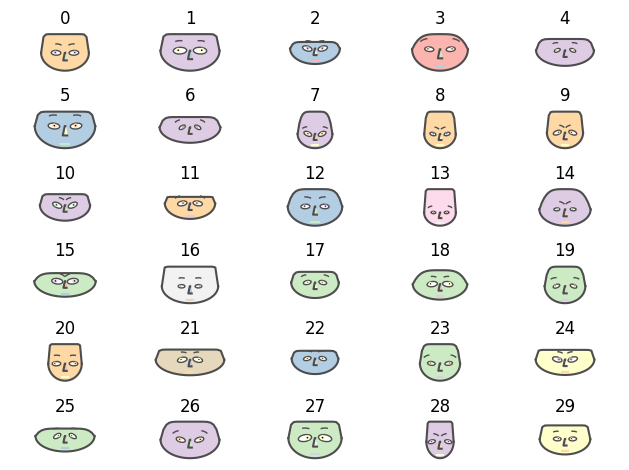

In [28]:
#establish the random range
numpy.random.seed(64)
data = numpy.random.rand(30,7)
# chernoff faces 
# Make Chernoff faces
fig = chernoff_face(data=data, 
                    titles=[str(x) for x in list(range(len(data)))], 
                    color_mapper=matplotlib.cm.Pastel1)

# Display
fig.tight_layout()
matplotlib.pyplot.show()


In [29]:
dfData=load_employee_attitude_data_frame()
dfData.head()

,Rating,Complaints,Privileges,Learning,Raises,Critical,Advancement
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [30]:
dfData2 = variables_rescale(dfData)
dfData2.head()

,Rating,Complaints,Privileges,Learning,Raises,Critical,Advancement
0,0.066667,0.264151,0.000000,0.121951,0.400000,1.000000,0.425532
1,0.511111,0.509434,0.396226,0.487805,0.444444,0.558140,0.468085
2,0.688889,0.622642,0.716981,0.853659,0.733333,0.860465,0.489362
3,0.466667,0.490566,0.283019,0.317073,0.244444,0.813953,0.212766
4,0.911111,0.773585,0.490566,0.780488,0.622222,0.790698,0.468085


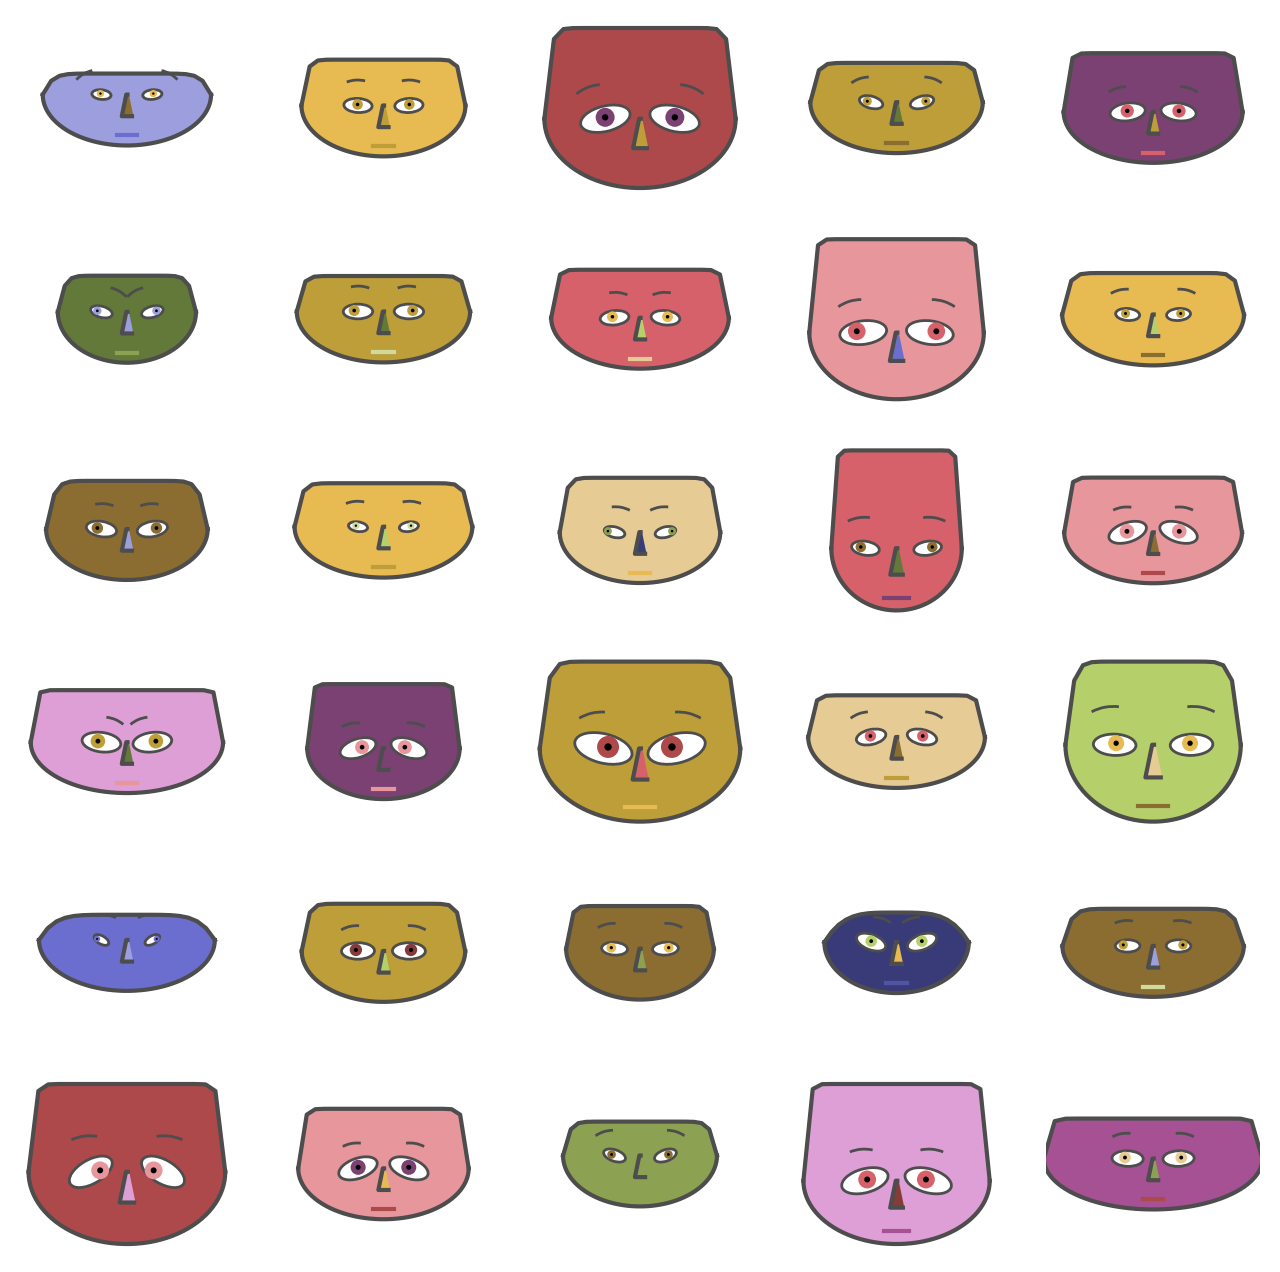

In [31]:
fig = chernoff_face(data=dfData2,
                    n_columns=5,
                    long_face=False,
                    color_mapper=matplotlib.cm.tab20b,
                    figsize=(8, 8), dpi=200)

In [ ]:
# this one will be dedicated to making the reoccurence of the chernoff faces be plotted on a graph